In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
CE4L = pd.read_csv('./magazine/final/CE4L_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [4]:
CE4L['ADFN_2'] = CE4L['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [5]:
CE4L['ADFN_2']

0      [골드, 장식, 포인트, 준, 케이프, 체크, 코트, 백, 산드로, Sandro, ...
1      [재킷, 셔츠, 크리스, CELINE, CELINE, 팬츠, 다잉브, 리드, 슈즈,...
2      [민트, 색, 후드, 톱, 크롬, 하츠, Chrome, Hearts, 안경, CEL...
3      [빈티지, 한, 체크, 무늬, 재킷, CELINE, CELINE, 비비드, 핑크, ...
4      [화이트, 슬리브, 리스, 스트라이프, 오버, 팬츠, CELINE, CELINE, ...
                             ...                        
383    [밀란, 패션위크, 참석, 차, 출국, 리사, 공항, BLACKPINK, 리사, 오...
384    [리사, 패션, 브랜드, 탄생, 할, 보인다, YG, 엔터테인먼트, BLACKPIN...
385    [서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ...
386    [내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ...
387    [한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, BLACKPINK,...
Name: ADFN_2, Length: 388, dtype: object

### top50 리스트 생성

In [6]:
top500 = pd.read_csv('./CE4L_top500.csv', sep='|', encoding = 'utf-8')

In [7]:
top500

,word,count
0,리사,3576
1,예쁘다,676
2,귀엽다,543
3,CELINE,526
4,춤,478
...,...,...
495,강아지,22
496,막내,22
497,마노,22
498,쁘쁘,22


In [8]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['리사', '예쁘다', '귀엽다', 'CELINE', '춤', '사랑', '패션', '랩', '한국', '영어', '브랜드', '노래', '컬렉션', '매력', '무대', '얼굴', '컬러', '아이돌', 'SLIMANE', 'HEDI', '태국', '룩', '중국', '한국어', '한국인', '가장', '느낌', '스타일', '비율', '표정']


In [9]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['리사', '예쁘다', '귀엽다', 'CELINE', '춤', '사랑', '패션', '랩', '한국', '영어', '브랜드', '노래', '컬렉션', '매력', '무대', '얼굴', '컬러', '아이돌', 'SLIMANE', 'HEDI', '태국', '룩', '중국', '한국어', '한국인', '가장', '느낌', '스타일', '비율', '표정', '블랙', '디자이너', '멋있다', '실력', '팬', '외국인', '여자', '눈', '시즌', '옷', '모델', '지난', '여성', '재킷', '팬츠', '최고', '머리', '드레스', '백', '남성']


### top100

In [10]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['리사', '예쁘다', '귀엽다', 'CELINE', '춤', '사랑', '패션', '랩', '한국', '영어', '브랜드', '노래', '컬렉션', '매력', '무대', '얼굴', '컬러', '아이돌', 'SLIMANE', 'HEDI', '태국', '룩', '중국', '한국어', '한국인', '가장', '느낌', '스타일', '비율', '표정', '블랙', '디자이너', '멋있다', '실력', '팬', '외국인', '여자', '눈', '시즌', '옷', '모델', '지난', '여성', '재킷', '팬츠', '최고', '머리', '드레스', '백', '남성', '영국', '연습생', '쇼', '봄', '호랑이', '아이템', '인기', '새로운', '매치', '좋은', '세계', '그룹', '예능', '디렉터', '파리', '프로', '분위기', '프라다', '다리', '처음', '대', '포인트', 'PHOEBE', 'PHILO', '스타', '스커트', '디자인', '앞머리', '첫', '장식', 'LAURENT', '완성', '외국', '단발', '걸그룹', '태국인', 'SAINT', '노력', '인형', '시작', '참석', '여름', '좋다', '카리스마', 'YG', '대박', '코트', '복', '짱', '크리에이티브']


In [11]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['리사', '예쁘다', '귀엽다', 'CELINE', '춤', '사랑', '패션', '랩', '한국', '영어', '브랜드', '노래', '컬렉션', '매력', '무대', '얼굴', '컬러', '아이돌', 'SLIMANE', 'HEDI', '태국', '룩', '중국', '한국어', '한국인', '가장', '느낌', '스타일', '비율', '표정', '블랙', '디자이너', '멋있다', '실력', '팬', '외국인', '여자', '눈', '시즌', '옷', '모델', '지난', '여성', '재킷', '팬츠', '최고', '머리', '드레스', '백', '남성', '영국', '연습생', '쇼', '봄', '호랑이', '아이템', '인기', '새로운', '매치', '좋은', '세계', '그룹', '예능', '디렉터', '파리', '프로', '분위기', '프라다', '다리', '처음', '대', '포인트', 'PHOEBE', 'PHILO', '스타', '스커트', '디자인', '앞머리', '첫', '장식', 'LAURENT', '완성', '외국', '단발', '걸그룹', '태국인', 'SAINT', '노력', '인형', '시작', '참석', '여름', '좋다', '카리스마', 'YG', '대박', '코트', '복', '짱', '크리에이티브', '해외', '쌤', '데님', '한국말', '연출', '모든', '많은', '다양한', '이미지', '컴백', '간지', '선생님', '화이트', '라인', '셔츠', '목소리', 'DIOR', '리', '우리나라', '매장', '스타일링', '세상', '좋아요', '톱', '부츠', '티셔츠', '시대', '반', '시크', '미쳤다', '연습', '화보', '마음', '음악', '메이크업', 'FW', '성격', '클래식', '매우', '런웨이', '배', '콘서트', 'CHANEL', '메인', '춤선', '소재', '레드', '점', '언어', '미국', '일본', '패턴', '있을', '개인', '나라', '개

In [12]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['리사', '예쁘다', '귀엽다', 'CELINE', '춤', '사랑', '패션', '랩', '한국', '영어', '브랜드', '노래', '컬렉션', '매력', '무대', '얼굴', '컬러', '아이돌', 'SLIMANE', 'HEDI', '태국', '룩', '중국', '한국어', '한국인', '가장', '느낌', '스타일', '비율', '표정', '블랙', '디자이너', '멋있다', '실력', '팬', '외국인', '여자', '눈', '시즌', '옷', '모델', '지난', '여성', '재킷', '팬츠', '최고', '머리', '드레스', '백', '남성', '영국', '연습생', '쇼', '봄', '호랑이', '아이템', '인기', '새로운', '매치', '좋은', '세계', '그룹', '예능', '디렉터', '파리', '프로', '분위기', '프라다', '다리', '처음', '대', '포인트', 'PHOEBE', 'PHILO', '스타', '스커트', '디자인', '앞머리', '첫', '장식', 'LAURENT', '완성', '외국', '단발', '걸그룹', '태국인', 'SAINT', '노력', '인형', '시작', '참석', '여름', '좋다', '카리스마', 'YG', '대박', '코트', '복', '짱', '크리에이티브', '해외', '쌤', '데님', '한국말', '연출', '모든', '많은', '다양한', '이미지', '컴백', '간지', '선생님', '화이트', '라인', '셔츠', '목소리', 'DIOR', '리', '우리나라', '매장', '스타일링', '세상', '좋아요', '톱', '부츠', '티셔츠', '시대', '반', '시크', '미쳤다', '연습', '화보', '마음', '음악', '메이크업', 'FW', '성격', '클래식', '매우', '런웨이', '배', '콘서트', 'CHANEL', '메인', '춤선', '소재', '레드', '점', '언어', '미국', '일본', '패턴', '있을', '개인', '나라', '개

In [13]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['리사', '예쁘다', '귀엽다', 'CELINE', '춤', '사랑', '패션', '랩', '한국', '영어', '브랜드', '노래', '컬렉션', '매력', '무대', '얼굴', '컬러', '아이돌', 'SLIMANE', 'HEDI', '태국', '룩', '중국', '한국어', '한국인', '가장', '느낌', '스타일', '비율', '표정', '블랙', '디자이너', '멋있다', '실력', '팬', '외국인', '여자', '눈', '시즌', '옷', '모델', '지난', '여성', '재킷', '팬츠', '최고', '머리', '드레스', '백', '남성', '영국', '연습생', '쇼', '봄', '호랑이', '아이템', '인기', '새로운', '매치', '좋은', '세계', '그룹', '예능', '디렉터', '파리', '프로', '분위기', '프라다', '다리', '처음', '대', '포인트', 'PHOEBE', 'PHILO', '스타', '스커트', '디자인', '앞머리', '첫', '장식', 'LAURENT', '완성', '외국', '단발', '걸그룹', '태국인', 'SAINT', '노력', '인형', '시작', '참석']


### top50만 남기기

In [15]:
len(CE4L)

388

In [16]:
top30_word = []
for i in range(len(CE4L)):
    w=[]
    for word in CE4L.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [17]:
top50_word = []
for i in range(len(CE4L)):
    w=[]
    for word in CE4L.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [18]:
top100_word = []
for i in range(len(CE4L)):
    w=[]
    for word in CE4L.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [19]:
top200_word = []
for i in range(len(CE4L)):
    w=[]
    for word in CE4L.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [20]:
top300_word = []
for i in range(len(CE4L)):
    w=[]
    for word in CE4L.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [21]:
top500_word = []
for i in range(len(CE4L)):
    w=[]
    for word in CE4L.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [22]:
CE4L

,magazine,brand,title,word,ADFN,ADFN_2
0,A,Ce,코트 체크,"골드 잠금 장식으로 포인트를 준 케이프 체크 코트는 1백9만원, 산드로(SANDRO...","['골드', '장식', '포인트', '준', '케이프', '체크', '코트', '백...","[골드, 장식, 포인트, 준, 케이프, 체크, 코트, 백, 산드로, Sandro, ..."
1,A,Ce,"GOOD TIME, 헨리","재킷, 셔츠, 네크리스는 모두 CELINE(CELINE), 팬츠는 다잉브리드, 슈즈...","['재킷', '셔츠', '크리스', 'CELINE', 'CELINE', '팬츠', ...","[재킷, 셔츠, 크리스, CELINE, CELINE, 팬츠, 다잉브, 리드, 슈즈,..."
2,A,Ce,하나만 걸쳐도 남달라! 후디 입는 법 12,"민트색 후드 톱은 가격미정, 크롬하츠(CHROME HEARTS). 안경은 52만원,...","['민트', '색', '후드', '톱', '크롬', '하츠', 'Chrome', '...","[민트, 색, 후드, 톱, 크롬, 하츠, Chrome, Hearts, 안경, CEL..."
3,A,Ce,가을에 어울리는 색을 딱 하나 고르면? 카멜색!,"빈티지한 체크무늬 재킷은 가격미정, CELINE(CELINE). 비비드한 핑크 컬러...","['빈티', '한', '체크', '무늬', '재킷', 'CELINE', 'CELIN...","[빈티지, 한, 체크, 무늬, 재킷, CELINE, CELINE, 비비드, 핑크, ..."
4,A,Ce,"웃음 뒤의 웃음, 남윤수","화이트 슬리브리스, 스트라이프 오버올 팬츠는 모두 CELINE(CELINE)., 화...","['화이트', '슬리브', '리스', '스트라이프', '오버', '팬츠', 'CEL...","[화이트, 슬리브, 리스, 스트라이프, 오버, 팬츠, CELINE, CELINE, ..."
...,...,...,...,...,...,...
383,W,L,밀라노로 떠난 리사,"밀란 패션위크 참석차 출국한 리사의 공항 룩., BLACKPINK 리사가 오늘 2월...","['밀란', '패션위크', '참석', '차', '출국', '리사', '공항', 'B...","[밀란, 패션위크, 참석, 차, 출국, 리사, 공항, BLACKPINK, 리사, 오..."
384,W,L,리사의 새로운 행보,", , 리사의 패션 브랜드가 탄생할 것으로 보인다. YG엔터테인먼트가 2019년 ...","['리사', '패션', '브랜드', '탄생', '할', '보인다', 'YG', '엔...","[리사, 패션, 브랜드, 탄생, 할, 보인다, YG, 엔터테인먼트, BLACKPIN..."
385,W,L,"블랙핑크X세레나 고메즈 영상통화, 협업 티징","서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...","['서로', '팬임', '인증', '두', '스타', 'BLACKPINK', '세레...","[서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ..."
386,W,L,블랙핑크가 아이스크림 셀카를 올린 이유는?,"내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...","['내셔널', '아이스크림', '데이', '기념', 'BLACKPINK', '귀여운...","[내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ..."


### item 남기기

In [129]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [22]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [23]:
# top100_not_item_word = []
# for i in range(len(tot_je)):
#     w=[]
#     for word in tot_je.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [24]:
# len(top100_not_item_word)

In [25]:
# top100_not_item_word[1]

In [26]:
# top50_word

In [28]:
len(top50_word)

1647

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [23]:
# 어프라이어리(Apriori)
from apyori import apriori

In [24]:
top30_word[0]

['컬러', 'CELINE', 'CELINE', 'CELINE']

In [32]:
# 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.07))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
205,"(리사, 패션)",0.211340,"[((), (리사, 패션), 0.211340206185567, 1.0), ((리사)...",2
219,"(패션, 브랜드)",0.164948,"[((), (패션, 브랜드), 0.16494845360824742, 1.0), ((...",2
146,"(컬렉션, CELINE)",0.157216,"[((), (컬렉션, CELINE), 0.15721649484536082, 1.0)...",2
148,"(CELINE, 패션)",0.157216,"[((), (CELINE, 패션), 0.15721649484536082, 1.0),...",2
182,"(리사, 매력)",0.154639,"[((), (리사, 매력), 0.15463917525773196, 1.0), ((리...",2
133,"(CELINE, 브랜드)",0.149485,"[((), (CELINE, 브랜드), 0.14948453608247422, 1.0)...",2
127,"(디자이너, CELINE)",0.139175,"[((), (디자이너, CELINE), 0.13917525773195877, 1.0...",2
237,"(컬렉션, 패션)",0.134021,"[((), (컬렉션, 패션), 0.13402061855670103, 1.0), ((...",2
130,"(룩, CELINE)",0.131443,"[((), (룩, CELINE), 0.13144329896907217, 1.0), ...",2
188,"(블랙, 리사)",0.131443,"[((), (블랙, 리사), 0.13144329896907217, 1.0), ((리...",2


In [33]:
for item in df['items']:
    if '리사' in item:
        print(item)

frozenset({'리사', '패션'})
frozenset({'리사', '매력'})
frozenset({'블랙', '리사'})
frozenset({'리사', '컬러'})
frozenset({'룩', '리사'})
frozenset({'리사', '포인트'})
frozenset({'사랑', '리사'})
frozenset({'리사', '스타일'})
frozenset({'리사', '무대'})
frozenset({'팬', '리사'})
frozenset({'리사', '얼굴'})
frozenset({'한국', '리사'})
frozenset({'리사', '브랜드'})
frozenset({'리사', '걸그룹'})
frozenset({'리사', '매치'})
frozenset({'그룹', '리사'})
frozenset({'완성', '리사'})
frozenset({'리사', '태국'})
frozenset({'예쁘다', '리사'})
frozenset({'좋은', '리사'})
frozenset({'가장', '리사'})
frozenset({'재킷', '리사'})
frozenset({'세계', '리사'})
frozenset({'리사', '분위기'})
frozenset({'리사', '인형'})
frozenset({'리사', '아이돌'})
frozenset({'시크', '리사'})
frozenset({'스타', '리사'})
frozenset({'모델', '리사'})
frozenset({'느낌', '리사'})
frozenset({'리사', '춤'})
frozenset({'리사', 'YG'})
frozenset({'리사', '데님'})
frozenset({'참석', '리사'})
frozenset({'리사', '눈'})
frozenset({'노래', '리사'})
frozenset({'리사', '귀엽다'})
frozenset({'리사', '레드'})
frozenset({'리사', '팬츠'})


### networkx 그래프 정의

In [34]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [35]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [36]:
pos = nx.spring_layout(G)

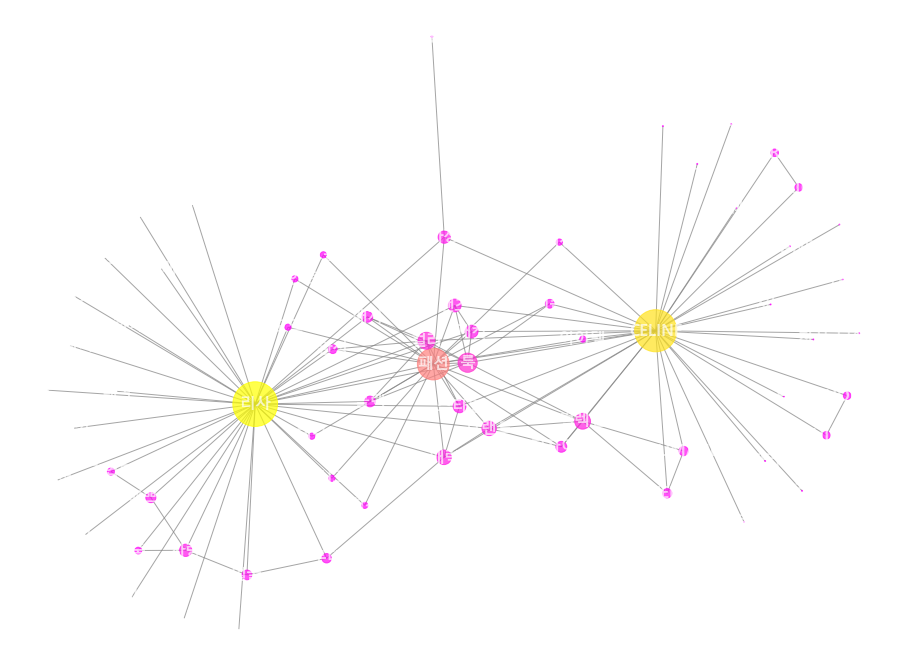

In [39]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.spring,
                font_color = 'white', font_weight = 'bold')

plt.savefig('./nt_CE4L_top500_mins07-w.png', bbox_inches = 'tight')
plt.show()
